In [ ]:
!pip install geopandas -q
!pip install fiona -q
!pip install plotly -q
!pip install adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 13.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT
from adjustText import adjust_text
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
province_path = '/content/drive/My Drive/Notebooks/Bujumbura_scooping/SHP Admin1 Provinces/Burundi_Admin_1_Provinces.shp'
communes_path = '/content/drive/My Drive/Notebooks/Bujumbura_scooping/gadm41_BDI_shp/gadm41_BDI_2.shp'
population_path = '/content/drive/My Drive/Notebooks/Bujumbura_scooping/population/bdi_pop2020_worldpop_aggregated_collinesbcg2020.shp'

province = gpd.read_file(province_path)
communes = gpd.read_file(communes_path)
population = gpd.read_file(population_path)


In [ ]:
Bujumbura_province = province[province['admin1Name'] == 'Bujumbura Mairie']

In [ ]:
communes.head(5)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BDI.1.1_1,BDI,Burundi,BDI.1_1,Bubanza,NA,Bubanza,NA,NA,Commune,Commune,003BDI001001,BI.BB.BU,"POLYGON ((29.35659 -3.15993, 29.35501 -3.15845..."
1,BDI.1.2_1,BDI,Burundi,BDI.1_1,Bubanza,NA,Gihanga,NA,NA,Commune,Commune,003BDI001002,BI.BB.GI,"POLYGON ((29.31085 -3.28654, 29.30977 -3.28747..."
2,BDI.1.3_1,BDI,Burundi,BDI.1_1,Bubanza,NA,Mpanda,NA,NA,Commune,Commune,003BDI001003,BI.BB.MP,"POLYGON ((29.34405 -3.24477, 29.34391 -3.24322..."
3,BDI.1.4_1,BDI,Burundi,BDI.1_1,Bubanza,NA,Musigati,NA,NA,Commune,Commune,003BDI001004,BI.BB.MU,"POLYGON ((29.51468 -3.13881, 29.51384 -3.13998..."
4,BDI.1.5_1,BDI,Burundi,BDI.1_1,Bubanza,NA,Rugazi,NA,NA,Commune,Commune,003BDI001005,BI.BB.RU,"POLYGON ((29.42067 -3.26893, 29.41769 -3.27127..."


In [ ]:
Bujumbura_communes = communes[communes['NAME_1'] == 'Bujumbura Mairie']
Bujumbura_communes = Bujumbura_communes[Bujumbura_communes['NAME_2'] != 'Lake Tanganyika']
Bujumbura_communes

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
5,BDI.2.1_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Buterere,NA,NA,Commune,Commune,003BDI017001,NA,"POLYGON ((29.36275 -3.33601, 29.36249 -3.33678..."
6,BDI.2.2_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Buyenze,NA,NA,Commune,Commune,003BDI017002,NA,"POLYGON ((29.36684 -3.36539, 29.36681 -3.36552..."
7,BDI.2.3_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Bwiza,NA,NA,Commune,Commune,003BDI017003,NA,"POLYGON ((29.36393 -3.37600, 29.36395 -3.37571..."
8,BDI.2.4_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Cibitoke,NA,NA,Commune,Commune,003BDI017004,NA,"POLYGON ((29.36066 -3.34653, 29.36075 -3.34631..."
9,BDI.2.5_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Gihosha,NA,NA,Commune,Commune,003BDI017005,NA,"POLYGON ((29.37526 -3.36857, 29.37494 -3.36819..."
10,BDI.2.6_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Kamenge,NA,NA,Commune,Commune,003BDI017006,NA,"POLYGON ((29.38147 -3.34842, 29.38172 -3.34787..."
11,BDI.2.7_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Kanyosha2,NA,NA,Commune,Commune,003BDI017007,NA,"POLYGON ((29.34292 -3.42341, 29.34322 -3.42342..."
12,BDI.2.8_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Kinama,NA,NA,Commune,Commune,003BDI017008,NA,"POLYGON ((29.36275 -3.33601, 29.36288 -3.33545..."
13,BDI.2.9_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Kinindo,NA,NA,Commune,Commune,003BDI017009,NA,"POLYGON ((29.35670 -3.42394, 29.35639 -3.42389..."
15,BDI.2.11_1,BDI,Burundi,BDI.2_1,Bujumbura Mairie,NA,Musaga,NA,NA,Commune,Commune,003BDI017010,NA,"POLYGON ((29.37283 -3.42778, 29.37255 -3.42779..."


In [ ]:
names = Bujumbura_communes['NAME_2']
print(names)

5      Buterere
6       Buyenze
7         Bwiza
8      Cibitoke
9       Gihosha
10      Kamenge
11    Kanyosha2
12       Kinama
13      Kinindo
15       Musaga
16      Ngagara
17    Nyakabiga
18     Roherero
Name: NAME_2, dtype: object


<Axes: >

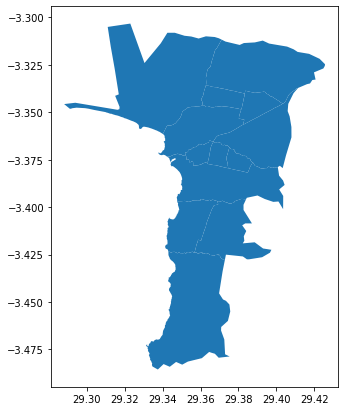

In [ ]:
Bujumbura_communes.plot(figsize=(7,7))

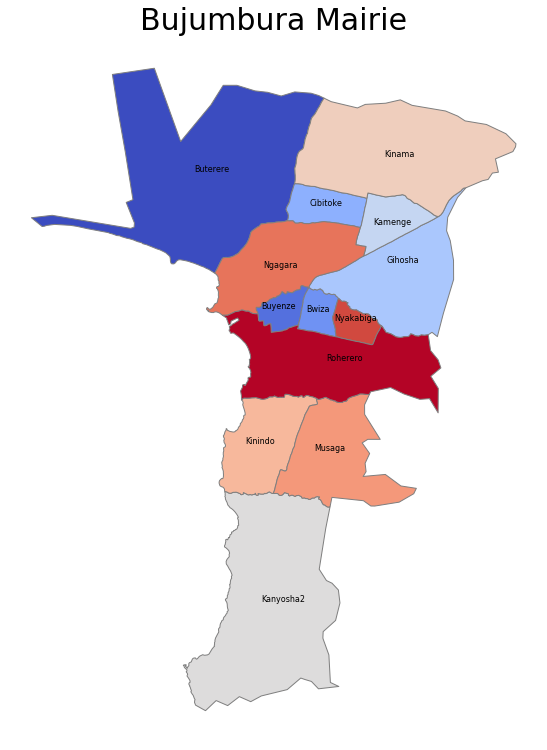

In [ ]:
#Adding text to the communes 
Bujumbura_communes['coords'] = Bujumbura_communes['geometry'].apply(lambda x: x.representative_point().coords[:])
Bujumbura_communes['coords'] = [coords[0] for coords in Bujumbura_communes['coords']]
fig,ax = plt.subplots(figsize=(13,13))
Bujumbura_communes.plot(ax=ax,cmap = 'coolwarm', linewidth =1,edgecolor='grey',legend =True)
ax.set_title('Bujumbura Mairie',fontdict={'fontsize':'30','fontweight':'25'})
ax.axis('off')
for idx,row in Bujumbura_communes.iterrows():
  plt.annotate(text=row['NAME_2'],xy=row['coords'],horizontalalignment='center',size=8)


In [ ]:
population.head()

,id_,colline,commune,id1,zone_code,count,area_1,sum,pop_dens,geometry
0,003BDI003006011,Kizuka,Rumonge,003BDI003006011,1.0,473.0,13.912127,14072.400654,1011.520448,"POLYGON ((765888.350 9572992.546, 766270.917 9..."
1,003BDI003006020,Mwange,Rumonge,003BDI003006020,2.0,456.0,19.555788,11359.407650,580.871901,"POLYGON ((769352.634 9569703.517, 769685.972 9..."
2,003BDI003006004,Gatwe,Rumonge,003BDI003006004,3.0,261.0,7.564929,4250.216910,561.831679,"POLYGON ((767247.389 9574813.718, 767282.700 9..."
3,003BDI003006002,Centre-Urbain,Rumonge,003BDI003006002,4.0,705.0,8.597984,62227.888329,7237.497230,"POLYGON ((769433.863 9561767.867, 770087.658 9..."
4,003BDI003006018,Mutambara,Rumonge,003BDI003006018,5.0,492.0,15.919407,17996.566904,1130.479746,"POLYGON ((774071.082 9558923.492, 774506.652 9..."


In [ ]:
mairie_population = population[population['zone_code']==0.0]
mairie_population

,id_,colline,commune,id1,zone_code,count,area_1,sum,pop_dens,geometry
2615,NaN,NaN,NaN,NaN,0.0,1248.0,27.195470,53181.502917,1955.527998,"POLYGON ((758123.308 9634586.277, 758950.655 9..."
2616,NaN,NaN,NaN,NaN,0.0,157.0,1.396934,89317.901489,63938.548384,"POLYGON ((762926.322 9627573.583, 762891.371 9..."
2617,NaN,NaN,NaN,NaN,0.0,166.0,1.386265,71202.760921,51363.028217,"POLYGON ((763085.667 9627629.507, 763134.658 9..."
2618,NaN,NaN,NaN,NaN,0.0,288.0,2.506544,96120.028276,38347.632280,"POLYGON ((764696.141 9629831.439, 764671.745 9..."
2619,NaN,NaN,NaN,NaN,0.0,1073.0,9.907257,74433.235754,7513.001038,"POLYGON ((767567.914 9627931.290, 767241.299 9..."
2620,NaN,NaN,NaN,NaN,0.0,320.0,2.741194,94529.838774,34484.918134,"POLYGON ((765350.851 9630542.639, 765428.424 9..."
2621,NaN,NaN,NaN,NaN,0.0,1603.0,21.629673,110350.895542,5101.829178,"POLYGON ((760454.473 9621240.398, 760498.371 9..."
2622,NaN,NaN,NaN,NaN,0.0,1550.0,16.700336,94157.166389,5638.040267,"POLYGON ((763711.720 9633523.754, 764540.249 9..."
2623,NaN,NaN,NaN,NaN,0.0,698.0,6.123487,39975.024164,6528.147570,"POLYGON ((762474.709 9624283.147, 762549.716 9..."
2624,NaN,NaN,NaN,NaN,0.0,901.0,8.503332,82591.209769,9712.805222,"POLYGON ((764828.545 9624328.480, 764867.234 9..."


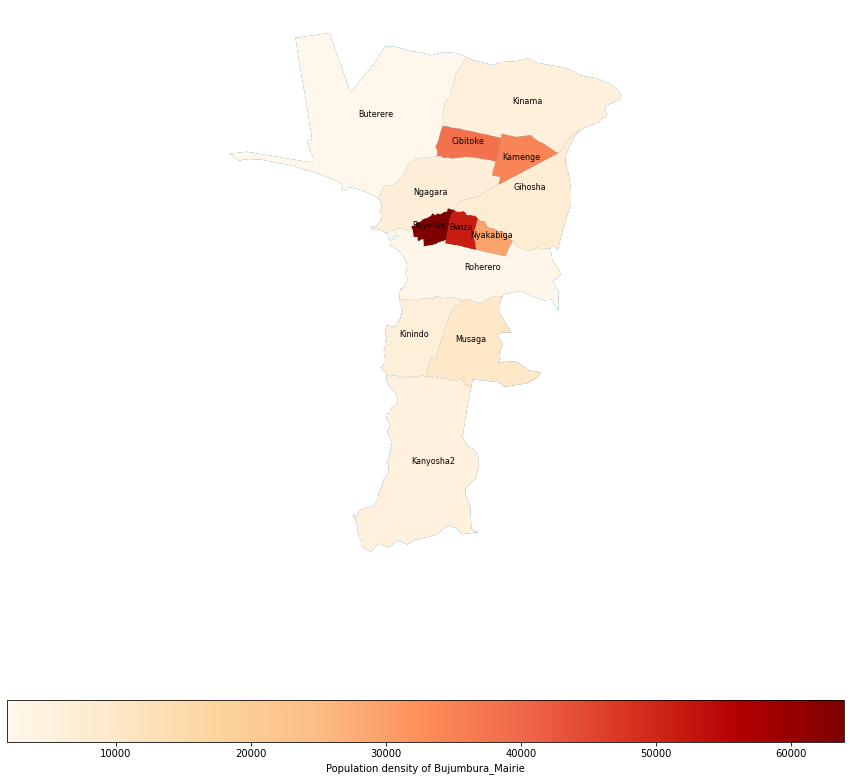

In [116]:
fig,ax2 = plt.subplots(1,1,figsize=(15,15))
Bujumbura_communes.to_crs(epsg=4326).plot(ax=ax2)
mairie_population.to_crs(epsg=4326).plot(ax=ax2,column ='pop_dens',cmap ='OrRd',legend = True,legend_kwds = {'label':'Population density of Bujumbura_Mairie','orientation':'horizontal'}).set_axis_off()
for idx,row in Bujumbura_communes.iterrows():
  plt.annotate(text=row['NAME_2'],xy=row['coords'],horizontalalignment='center',size=8)

In [131]:
natural_path = '/content/drive/My Drive/Notebooks/Bujumbura_scooping/hotosm_bdi_roads_polygons_shp/hotosm_bdi_roads_polygons.shp'
natural = gpd.read_file(natural_path)